<a href="https://colab.research.google.com/github/CaroPer27/Pr-ctica-2.2-An-lisis-de-Componentes-Principales/blob/main/Practica2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cargamos los Datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

column_labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N"]
wine_data = pd.read_csv('/content/drive/MyDrive/Wine.csv', names=column_labels)
wine_data.head(5)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Eliminamos el index

In [ ]:
wine_data = wine_data.drop('A', axis=1)

In [ ]:
wine_data.head(5)

,B,C,D,E,F,G,H,I,J,K,L,M,N
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Normalizamos los datos Por Min-Max

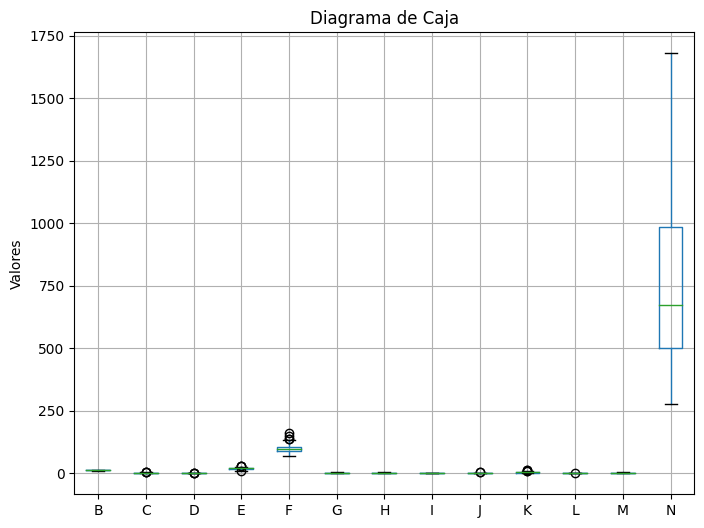

In [ ]:
import matplotlib.pyplot as plt

# Elejimos las columnas 'Fare' y 'Age'
data = wine_data[['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']]

# Creamos un diagrama de caja
plt.figure(figsize=(8, 6))
data.boxplot(column=['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N'])
plt.title('Diagrama de Caja')
plt.ylabel('Valores')
plt.show()

In [ ]:
def min_max(df,B,C, D, E, F, G, H, I, J, K, L, M, N):
    # Obtenemos los mínimos y máximos las columnas
    min_val1 = df[B].min()
    max_val1 = df[B].max()

    min_val2 = df[C].min()
    max_val2 = df[C].max()

    min_val3 = df[D].min()
    max_val3 = df[D].max()

    min_val4 = df[E].min()
    max_val4 = df[E].max()

    min_val5 = df[F].min()
    max_val5 = df[F].max()

    min_val6 = df[G].min()
    max_val6 = df[G].max()

    min_val7 = df[H].min()
    max_val7 = df[H].max()

    min_val8 = df[I].min()
    max_val8 = df[I].max()

    min_val9 = df[J].min()
    max_val9 = df[J].max()

    min_val10 = df[K].min()
    max_val10 = df[K].max()

    min_val11= df[L].min()
    max_val11= df[L].max()

    min_val12 = df[M].min()
    max_val12= df[M].max()

    min_val13 = df[N].min()
    max_val13= df[N].max()


    # Normalizamos las columnas
    df['B'] = (df[B] - min_val1) / (max_val1 - min_val1)
    df['C'] = (df[C] - min_val2) / (max_val2 - min_val2)
    df['D'] = (df[D] - min_val3) / (max_val3 - min_val3)
    df['E'] = (df[E] - min_val4) / (max_val4 - min_val4)
    df['F'] = (df[F] - min_val5) / (max_val5 - min_val5)
    df['G'] = (df[G] - min_val6) / (max_val6 - min_val6)
    df['H'] = (df[H] - min_val7) / (max_val7 - min_val7)
    df['I'] = (df[I] - min_val8) / (max_val8 - min_val8)
    df['J'] = (df[J] - min_val9) / (max_val9 - min_val9)
    df['K'] = (df[K] - min_val10) / (max_val10 - min_val10)
    df['L'] = (df[L] - min_val11) / (max_val11 - min_val11)
    df['M'] = (df[M] - min_val12) / (max_val12 - min_val12)
    df['N'] = (df[N] - min_val13) / (max_val13 - min_val13)

    return df

In [ ]:
df = min_max(wine_data, 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N')

In [ ]:
df.head(5)

,B,C,D,E,F,G,H,I,J,K,L,M,N
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


### Calculamos las medias para cada Dimension

In [ ]:
mediab=0
mediac=0
mediad=0
mediae=0
mediaf=0
mediag=0
mediah=0
mediai=0
mediaj=0
mediak=0
medial=0
mediam=0
median =0

for valor in df['B']:
    mediab += valor

for valor in df['C']:
    mediac += valor

for valor in df['D']:
    mediad += valor

for valor in df['E']:
    mediae += valor

for valor in df['F']:
    mediaf += valor

for valor in df['G']:
    mediag += valor

for valor in df['H']:
    mediah += valor

for valor in df['I']:
    mediai += valor

for valor in df['J']:
    mediaj += valor

for valor in df['K']:
    mediak += valor

for valor in df['L']:
    medial += valor

for valor in df['M']:
    mediam += valor

for valor in df['N']:
    median += valor

mediaB = mediab / len(df['B'])
mediaC = mediac / len(df['C'])
mediaD = mediad / len(df['D'])
mediaE = mediae / len(df['E'])
mediaF = mediaf / len(df['F'])
mediaG = mediag / len(df['G'])
mediaH = mediah / len(df['H'])
mediaI = mediai / len(df['I'])
mediaJ = mediaj / len(df['J'])
mediaK = mediak / len(df['K'])
mediaL = medial / len(df['L'])
mediaM = mediam / len(df['M'])
mediaN = median / len(df['N'])
print("La media de B es: ",mediaB)
print("La media de C es: ",mediaC)
print("La media de D es: ",mediaD)
print("La media de E es: ",mediaE)
print("La media de F es: ",mediaF)
print("La media de G es: ",mediaG)
print("La media de H es: ",mediaH)
print("La media de I es: ",mediaI)
print("La media de J es: ",mediaJ)
print("La media de K es: ",mediaK)
print("La media de L es: ",mediaL)
print("La media de M es: ",mediaM)
print("La media de N es: ",mediaN)

La media de B es:  0.518583678296866
La media de C es:  0.31548385664164863
La media de D es:  0.5382443069158204
La media de E es:  0.4585022587744701
La media de F es:  0.32327796775769413
La media de G es:  0.4534870205346767
La media de H es:  0.3563860048357276
La media de I es:  0.4374602501589992
La media de J es:  0.37252330485946195
La media de K es:  0.3223626179200061
La media de L es:  0.3881702749611765
La media de M es:  0.491459851010413
La media de N es:  0.3344459760534708


### Calcular la matriz de Covarianza

In [ ]:
import pandas as pd
import numpy as np

cov_matrix = np.cov(df, rowvar=False)

cov_df = pd.DataFrame(cov_matrix, columns=df.columns, index=df.columns)

print(cov_df)

          B         C         D         E         F         G         H  \
B  0.045641  0.004452  0.006630 -0.011409  0.008981  0.013329  0.010661   
C  0.004452  0.048744  0.005313  0.010965 -0.001871 -0.015970 -0.019122   
D  0.006630  0.005313  0.021523  0.011197  0.006527  0.004084  0.003558   
E -0.011409  0.010965  0.011197  0.029633 -0.002227 -0.011929 -0.012746   
F  0.008981 -0.001871  0.006527 -0.002227  0.024101  0.007183  0.006405   
G  0.013329 -0.015970  0.004084 -0.011929  0.007183  0.046574  0.039318   
H  0.010661 -0.019122  0.003558 -0.012746  0.006405  0.039318  0.044407   
I -0.007822  0.015189  0.006416  0.014630 -0.009343 -0.022801 -0.026617   
J  0.005273 -0.008800  0.000256 -0.006133  0.006627  0.023863  0.024834   
K  0.023089  0.010874  0.007513  0.000638  0.006140 -0.002354 -0.007185   
L -0.002848 -0.023029 -0.002036 -0.008764  0.001598  0.017392  0.021283   
M  0.004019 -0.021171  0.000149 -0.012391  0.002665  0.039285  0.043142   
N  0.030890 -0.009522  0.